In [36]:
# import packages for project
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style 
%matplotlib inline
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [37]:
#open csv
ovsv = pd.read_csv('us_dev_df.csv')

In [38]:
#review data
ovsv.head()

,Unnamed: 0,MainBranch,Age,Employment,EdLevel,YearsCode,YearsCodePro,Salary,Languages,Databases,num_of_lang,num_of_db
0,0,I am a developer by profession,45-54 years old,"Employed, full-time",Some college/university study without earning ...,38,30,195000.0,Bash/Shell (all shells);C#;HTML/CSS;JavaScript...,Microsoft SQL Server;PostgreSQL;Snowflake,7,3
1,1,I am a developer by profession,25-34 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,11,230000.0,Bash/Shell (all shells);Go;Python;Rust,BigQuery;Elasticsearch;MariaDB;MongoDB;Redis;S...,4,6
2,2,I am a developer by profession,35-44 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25,23,85000.0,Bash/Shell (all shells);C#;C++;Go;HTML/CSS;Jav...,Microsoft SQL Server,8,1
3,3,I am a developer by profession,35-44 years old,"Employed, full-time","Secondary school (e.g. American high school, G...",20,18,160000.0,C#;Go;HTML/CSS;JavaScript;SQL;TypeScript,MariaDB;Microsoft SQL Server;PostgreSQL,6,3
4,4,I am a developer by profession,45-54 years old,"Employed, full-time","Associate degree (A.A., A.S., etc.)",10,10,115000.0,Apex;C#;JavaScript;Python;SQL,Microsoft SQL Server,5,1


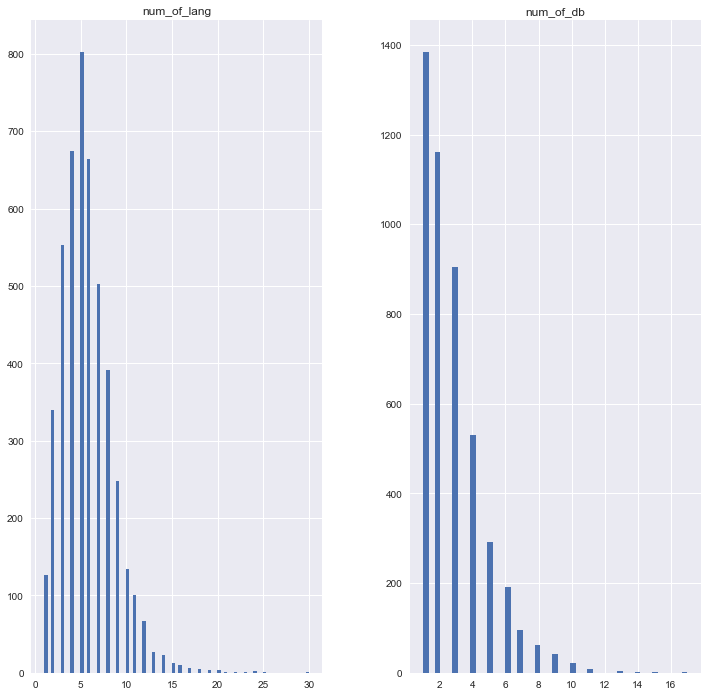

In [58]:
#continuous variables
con = ['YearsCodePro', 'num_of_lang', 'num_of_db']
ovsv_cont = ovsv[con]
ovsv_cont.hist(figsize=[12,12], bins='auto')
plt.show()

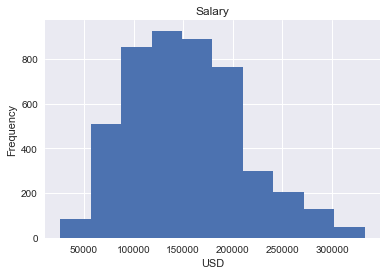

In [40]:
#Salary Hist
ovsv['Salary'].plot(kind='hist')
plt.title('Salary')
plt.xlabel('USD')
plt.show()

In [41]:
#Mean of Salary based on Education
round(ovsv.groupby('EdLevel')['Salary'].mean())

EdLevel
Associate degree (A.A., A.S., etc.)                                                   129133.0
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          150698.0
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       163100.0
Primary/elementary school                                                             143147.0
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                        158698.0
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    141546.0
Some college/university study without earning a degree                                147627.0
Something else                                                                        118057.0
Name: Salary, dtype: float64

In [76]:
print('Min Salary:',ovsv['Salary'].min())
print('Median Salary:',ovsv['Salary'].median())
print('Mean Salary:', round(ovsv['Salary'].mean()))
print('Max Salary:',ovsv['Salary'].max())

Min Salary: 26000.0
Median Salary: 147514.5
Mean Salary: 151890
Max Salary: 333000.0


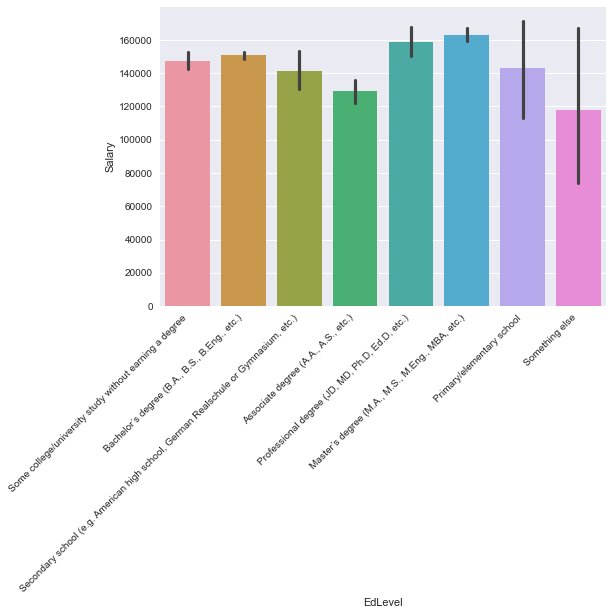

In [73]:
#Data Vis of Education Level Vs Salary
sns.barplot(x='EdLevel', y='Salary', data = ovsv)
plt.xticks(rotation=45, ha='right')

plt.show()

In [77]:
#Making the formula
form = 'Salary~num_of_lang'

model = ols(formula=form, data=ovsv).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.511
Date:                Sat, 05 Apr 2025   Prob (F-statistic):             0.0108
Time:                        16:30:00   Log-Likelihood:                -58257.
No. Observations:                4704   AIC:                         1.165e+05
Df Residuals:                    4702   BIC:                         1.165e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.562e+05   1888.792     82.700      0.000    1.52e+05     1.6e+05
num_of_lang  -755.8749    296.233     -2.552      0.011   -1336.631    -175.119
==============================================================================
Omnibus:                      240.158   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.823
Skew:                           0.595   Prob(JB):                     4.69e-61
Kurtosis:                       3.050   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#creating simple linear regression
X = ovsv[['num_of_lang']]
y = ovsv[['Salary']]

In [56]:
#training model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lreg = LinearRegression()
lreg.fit(X_train, y_train)

y_ovsv_train = lreg.predict(X_train)
y_ovsv_test = lreg.predict(X_test)

In [57]:
#model is good test results are similar
mse_train = np.sum((y_train-y_ovsv_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_ovsv_test)**2)/len(y_test)
print('Train Mean Squared Error:',mse_train)
print('Test Mean Squared Error:',mse_test)

Train Mean Squared Error: Salary    3.329903e+09
dtype: float64
Test Mean Squared Error: Salary    3.412788e+09
dtype: float64
